In [1]:
import numpy as np
import yaml
import matplotlib.pyplot as plt
import math
import os

In [2]:
## Config information and file paths
stacsdir = './stacs'
netwkdir = stacsdir + '/' + 'networks/polyrect'
recordir = stacsdir + '/' + 'networks/polyrect/record'
filebase = 'polynet'
npdat = 8
npnet = 8
nprun = 8

# Simulation arguments
charmrun = stacsdir + '/' + 'charmrun'
charm_pe = "+p" + str(nprun)
stacs = stacsdir + '/' + 'stacs'
runconf = netwkdir + '/' + filebase + '.yml'
runmode = 'buildsim'

# Command to run
runcmd = charmrun + ' ' + charm_pe + ' ' + stacs + ' ' + runconf
print(runcmd)

./stacs/charmrun +p8 ./stacs/stacs ./stacs/networks/polyrect/polynet.yml


In [3]:
# Network models yaml
fname = netwkdir + '/' + filebase + '.model'
modelconfig = []
with open(fname,"r") as file:
    modelymls = yaml.safe_load_all(file)
    for modelyml in modelymls:
        modelconfig.append(modelyml)

In [4]:
for i, modelymls in enumerate(modelconfig):
    for modyml in modelconfig[i]:
        print(modyml,modelconfig[i][modyml])

type stream
modname spike_input
modtype 5
param [{'name': 'n', 'value': 100}]
port [{'name': 'input', 'value': 'input.yml'}]
type vertex
modname izhi_input
modtype 14
param [{'name': 'a', 'value': 0.02}, {'name': 'b', 'value': 0.2}, {'name': 'c', 'value': -65}, {'name': 'd', 'value': 8}, {'name': 'thal_rate', 'value': 0.0}, {'name': 'thal_ampl', 'value': 0.0}, {'name': 'psn_rate', 'value': 0.0}]
state [{'name': 'v', 'init': 'constant', 'value': -65.0}, {'name': 'u', 'init': 'constant', 'value': -13.0}, {'name': 'I', 'init': 'constant', 'value': 0.0}, {'name': 'I_app', 'init': 'constant', 'value': 0.0}, {'name': 'I_clamp', 'init': 'constant', 'value': 0.0}]
type vertex
modname izhiex
modtype 14
param [{'name': 'a', 'value': 0.02}, {'name': 'b', 'value': 0.2}, {'name': 'c', 'value': -65}, {'name': 'd', 'value': 8}, {'name': 'thal_rate', 'value': 1.0}, {'name': 'thal_ampl', 'value': 20.0}, {'name': 'psn_rate', 'value': 0.0}]
state [{'name': 'v', 'init': 'constant', 'value': -65.0}, {'name

In [5]:
# Network graph yaml
fname = netwkdir + '/' + filebase + '.graph'
with open(fname,"r") as file:
    graphconfig = yaml.safe_load(file)

In [6]:
for part in graphconfig:
    for p in graphconfig[part]:
        print(part,p)

stream {'modname': 'spike_input', 'coord': [0.0, 0.0, 0.0]}
vertex {'modname': 'izhi_input', 'order': 100, 'shape': 'rectangle', 'width': 100.0, 'height': 100.0, 'coord': [0.0, 0.0, 0.0]}
vertex {'modname': 'izhiex', 'order': 4000, 'shape': 'rectangle', 'width': 100.0, 'height': 100.0, 'coord': [0.0, 0.0, 0.0]}
vertex {'modname': 'izhiin', 'order': 1000, 'shape': 'rectangle', 'width': 100.0, 'height': 100.0, 'coord': [0.0, 0.0, 0.0]}
edge {'source': 'spike_input', 'target': ['izhi_input'], 'modname': 'synclamp', 'cutoff': 0.0, 'dist': 'periodic rectangle', 'width': 100.0, 'height': 100.0, 'connect': [{'type': 'uniform', 'prob': 1.0}]}
edge {'source': 'izhi_input', 'target': ['izhiex'], 'modname': 'exstdp', 'cutoff': 20.0, 'dist': 'periodic rectangle', 'width': 100.0, 'height': 100.0, 'connect': [{'type': 'uniform', 'prob': 0.1}]}
edge {'source': 'izhiex', 'target': ['izhiex', 'izhiin'], 'modname': 'exstdp', 'cutoff': 0.0, 'dist': 'periodic rectangle', 'width': 100.0, 'height': 100.0, '

In [7]:
# Network simulation yaml
fname = netwkdir + '/' + filebase + '.yml'
with open(fname,"r") as file:
    simconfig = yaml.safe_load(file)

In [8]:
for part in simconfig:
    print(part, simconfig[part])

runmode simulate
randseed 2032
plastic True
episodic False
loadbal False
rpcport /stacs/rpc
rpcpause False
netwkdir /Users/felwang/Documents/Projects/STACS/stacs/networks/polyrect
netparts 8
netfiles 8
filebase polynet
fileload 
filesave .out
recordir record
groupdir group
tstep 1.0
teventq 20.0
tdisplay 1000.0
trecord 10000.0
tbalance 20000.0
tsave 30000.0
tmax 60000.0
grpactive ['izhiex', 'izhiin']
grpmother ['izhiex']
grpanchor ['exnostdp']
grpminlen 7
grpmaxdur 150.0
grpvtxmin 0.0
grpvtxmax 1.0


In [9]:
# Modify the simulation configuration
simconfig['loadbal'] = False
simconfig['tbalance'] = 20000.0

In [10]:
fname = netwkdir + '/' + filebase + '.yml'
with open(fname,"w") as file:
    yaml.dump(simconfig,file,sort_keys=False)

In [11]:
# Build the network
runmode = 'build'
!{runcmd + ' ' + runmode}


Running as 8 OS processes:  ./stacs/stacs ./stacs/networks/polyrect/polynet.yml build 
charmrun> mpirun -np 8  ./stacs/stacs ./stacs/networks/polyrect/polynet.yml build 
Charm++> Running on MPI version: 3.1
Charm++> level of thread support used: -1 (desired: 0)
Charm++> Running in non-SMP mode: 8 processes (PEs)
Converse/Charm++ Commit ID: v70000
Charm++ built without optimization.
Do not use for performance benchmarking (build with --with-production to do so).
Charm++ built with internal error checking enabled.
Do not use for performance benchmarking (build without --enable-error-checking to do so).
Isomalloc> Synchronized global address space.
CharmLB> Load balancer assumes all CPUs are same.
Charm++> Running on 1 hosts (1 sockets x 8 cores x 2 PUs = 16-way SMP)
Charm++> cpu topology info is gathered in 0.005 seconds.

Simulation Tool for Asynchronous Cortical Streams (stacs)
Reading config from ./stacs/networks/polyrect/polynet.yml
Reading model information
  Model: 1   Name: spike

In [12]:
## Count the number of vertex models
vtxmods = {}
# This is done by looping through the .state files
for datidx in range(0,npdat) :
    fname = netwkdir + '/' + filebase + '.state.' + str(datidx)
    with open(fname, 'r') as fstate:
        for line in fstate:
            vtxmods[line.split(None, 1)[0]] = vtxmods.get(line.split(None, 1)[0], 0) + 1

In [13]:
## Bookkeeping and counting
maxidx = 0
preidx = {}
vtxidx = {}
vertex_modnames = []
population_prefix = []
for key, value in vtxmods.items():
    vertex_modnames.append(key)
    print (key, value)
    preidx[key] = maxidx
    population_prefix.append(maxidx)
    vtxidx[key] = 0
    maxidx += value
population_prefix.append(maxidx)
print ('total vertices:', maxidx)

spike_input 1
izhi_input 100
izhiex 4000
izhiin 1000
total vertices: 5101


In [14]:
## Reindexing
index = 0
vtxmap = np.zeros(maxidx)
for datidx in range(0,npdat) :
    fname = netwkdir + '/' + filebase + '.state.' + str(datidx)
    with open(fname, 'r') as fstate:
        for line in fstate:
            vertex = line.split(None, 1)[0]
            vtxmap[index] = preidx[vertex] + vtxidx[vertex]
            index += 1
            vtxidx[vertex] += 1
#scipy.io.savemat('dg16revtxmap.mat', dict(vtxmap=vtxmap))

In [15]:
vtxmodidx = np.zeros(maxidx)
# This is pretty slow too...
for i in range(maxidx):
    for pop in range(len(population_prefix)-1):
        if (vtxmap[i] >= population_prefix[pop] and vtxmap[i] < population_prefix[pop+1]):
            vtxmodidx[int(vtxmap[i])] = pop

In [16]:
spike_input = {}

n_inputs = 100
n_rate = 2.0
t_max = 10000.0
event_list = []
for n in range(n_inputs):
    evtlist = np.sort(np.round(np.random.rand(int(n_rate*t_max/1000))*t_max))
    event_list.append(evtlist.tolist())

In [17]:
spike_input["spike_list"] = event_list

In [18]:
fname = netwkdir + '/' + 'input.yml'
with open(fname,'w') as file:
    yaml.dump(spike_input,file)

In [19]:
with open("input.yml","r") as file:
    spike_input = yaml.safe_load(file)

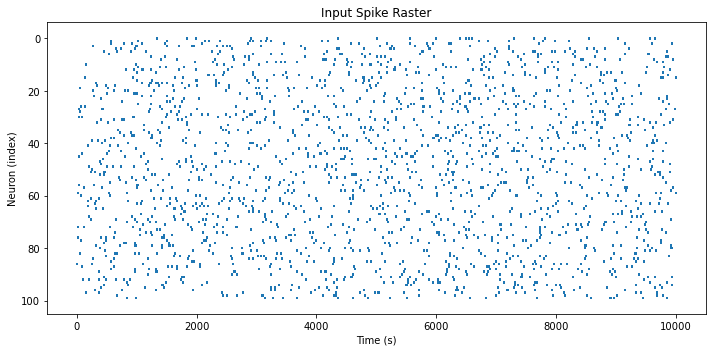

In [20]:
## Plot the event data
fig, axs = plt.subplots(1,1,figsize=(10,5))
axs.eventplot(spike_input["spike_list"],lineoffsets=1,linelengths=1.0,linewidths=2.0)
plt.title('Input Spike Raster')
plt.xlabel('Time (s)')
plt.ylabel('Neuron (index)')
plt.tight_layout()
plt.gca().invert_yaxis()

In [21]:
# Run the simulation
#!{runcmd}
runmode = 'simulate'
!{runcmd + ' ' + runmode}


Running as 8 OS processes:  ./stacs/stacs ./stacs/networks/polyrect/polynet.yml simulate 
charmrun> mpirun -np 8  ./stacs/stacs ./stacs/networks/polyrect/polynet.yml simulate 
Charm++> Running on MPI version: 3.1
Charm++> level of thread support used: -1 (desired: 0)
Charm++> Running in non-SMP mode: 8 processes (PEs)
Converse/Charm++ Commit ID: v70000
Charm++ built without optimization.
Do not use for performance benchmarking (build with --with-production to do so).
Charm++ built with internal error checking enabled.
Do not use for performance benchmarking (build without --enable-error-checking to do so).
Isomalloc> Synchronized global address space.
CharmLB> Load balancer assumes all CPUs are same.
Charm++> Running on 1 hosts (1 sockets x 8 cores x 2 PUs = 16-way SMP)
Charm++> cpu topology info is gathered in 0.005 seconds.

Simulation Tool for Asynchronous Cortical Streams (stacs)
Reading config from ./stacs/networks/polyrect/polynet.yml
Reading model information
  Model: 1   Name:

In [22]:
# Some metadata for plotting the spike raster
TICKS_PER_MS = 1000000
trec = 10000 # Recording interval (this is how the files are named)
# Display range (right now set to be multiples of trec)
tmin = 0
tmax = 60000

In [23]:
## Check if files exist
# rec times
trecs = list(range(tmin+trec, tmax, trec))
if (not trecs) :
    trecs.append(tmax)
if (trecs[-1] < tmax) :
    trecs.append(tmax)
# check filenames
for r in range(0,npdat) :
    for t in trecs :
        fname = recordir + '/' + filebase + '.evtlog.' + str(t) + '.' + str(r)
        if not (os.path.isfile(fname)) :
            print ('file %s does not exist' % fname)

In [24]:
## Read event data
evtcount = 0
evtlist = [[] for _ in range(len(vtxmap))]
for t in trecs :
    for r in range(0,npdat) :
        # open file for reading
        fname = recordir + '/' + filebase + '.evtlog.' + str(t) + '.' + str(r)
        if (os.path.isfile(fname)) :
            with open(fname, 'r') as frec:
                for line in frec :
                    words = line.split()
                    evtype = int(words[0])
                    tstamp = (int(words[1], 16) // 100000)/10.0
                    idx = int(words[2])
                    # reindex
                    idx = int(vtxmap[idx])
                    # spikes only
                    if evtype == 0:
                        evtlist[idx].append(tstamp)
                        evtcount += 1
print(evtcount)

1659433


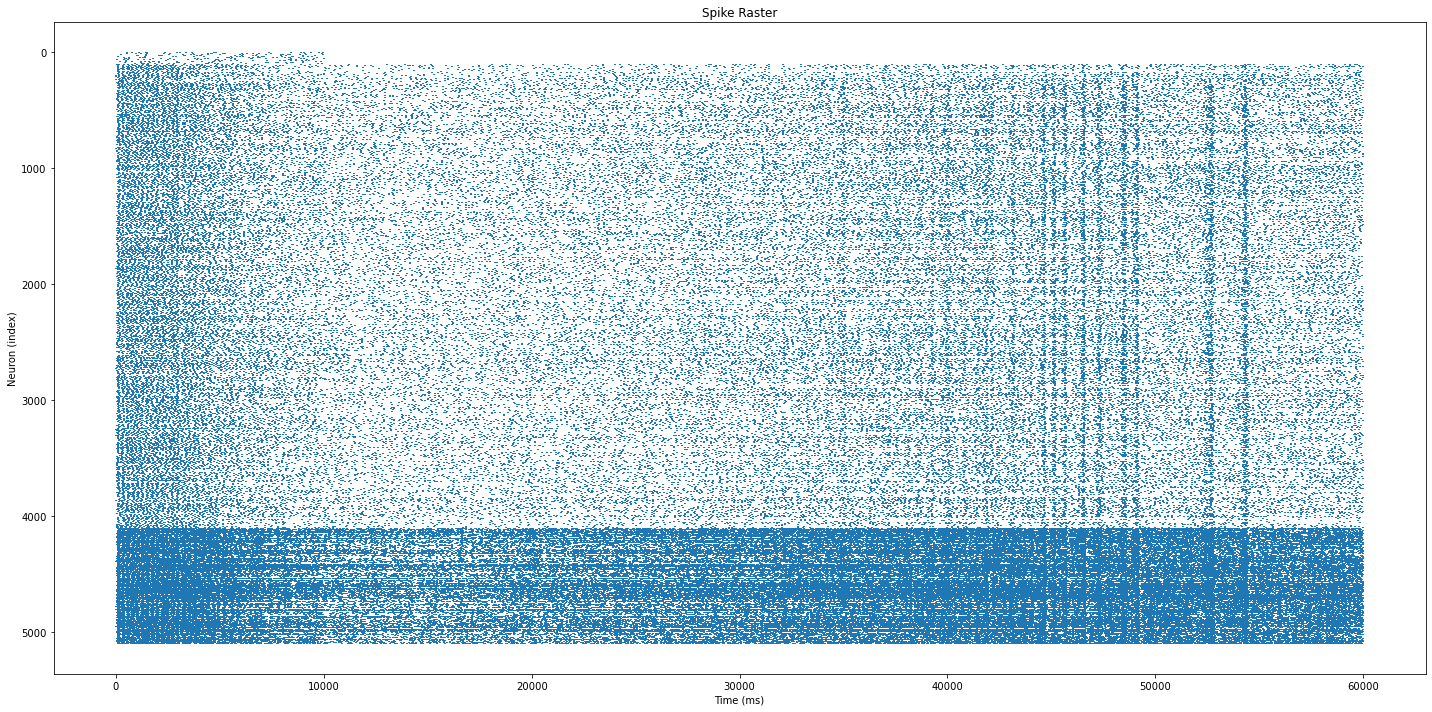

In [25]:
## Plot the event data
fig, axs = plt.subplots(1,1,figsize=(20,10))
axs.eventplot(evtlist,lineoffsets=1,linelengths=1.0,linewidths=2.0)
plt.title('Spike Raster')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron (index)')
plt.tight_layout()
plt.gca().invert_yaxis()